# Week 5 exercise session

You should have either Anaconda for python 3 installed, or be using the google colaboratory notebooks before beginning this exercises. Instructions on how to install this were sent to you at the beginning of the module and can be found on BlackBoard. 

**Under _Course Content_ on blackboard you can download `W5_exercise.ipynb` and the `W5_crime.csv` file**

Make sure to save both in the same exact folder. 

# Exercise 1: Getting started

## 1.1 Learning how to plot data

Given some data in an agreeable format, we will use the ```matplotlib``` library to plot the data. 

First we load the relevant plotting library.

In [1]:
import matplotlib.pyplot as plt  # Loading the plotting library

For this exercise you should visit the <a href="https://matplotlib.org/users/pyplot_tutorial.html">documentation </a> for `matplotlib` and figure out how to plot the x and y data against each other. 

First we will take the same data from the previous exercise and put it in a `Pandas` dataframe. For more information on the `Pandas` package please see the tutorial available on Blackboard under Week 3 -> Tutorials - Python Installation

In [2]:
import pandas as pd  # loading the pandas module

x_data = [1, 3, 5, 6, 7, 8, 10, 11, 14, 18]  # data from before
y_data = [14, 15, 22, 25, 22, 26, 33, 34, 35, 40]  # data from before

df = pd.DataFrame()  # creating an empty dataframe
df['x'] = x_data  # creating a column named 'x'
df['y'] = y_data  # creating a column named 'y'

<AxesSubplot:xlabel='x'>

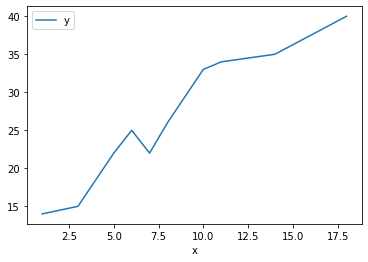

In [6]:
# your code here
df.plot(x = "x", y = "y")

## 1.2 Plotting a line

Given a line equation:
\begin{equation}
y = 2x + 1
\end{equation}

 
Plot a line with x values ranging from $0$ to $20$.

_Hint: you can first define a function with the line equation and then apply the line equation to a list of x values to get the y values. To do this you might need some help from the `NumPy` package (<a href="http://www.scipy-lectures.org/intro/numpy/operations.html">some help</a>). Below you can see that using the `NumPy` package you can add entire arrays together, element-wise._ 

In [7]:
import numpy as np  # loading the numpy module

list1 = list(range(10))  # a list from 0 to 9
list2 = list(range(15, 25))  # a list from 15 to 24


array1 = np.array(list1)  # casting the list to an array
array2 = np.array(list2)

print(array1)  # printing the first array
print(array2)  # printing the second array
print(array1 + array2)  # printing the sum of the two arrays

[0 1 2 3 4 5 6 7 8 9]
[15 16 17 18 19 20 21 22 23 24]
[15 17 19 21 23 25 27 29 31 33]


<AxesSubplot:xlabel='x_values'>

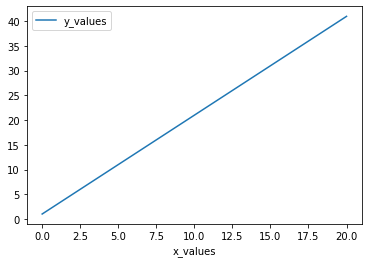

In [10]:
x_values = list(range(21))
x_array = np.array(x_values)
y_array = 2 * x_array + 1

frame = pd.DataFrame()
frame["x_values"] = x_array
frame["y_values"] = y_array
frame.plot("x_values", "y_values")


## 1.3 Minimising the RSS

In the lecture you learned that the best linear fit to a set of points minimises the RSS values. 

Using the data given below, try and find reasonable guesses for the line parameters (a, b) which minimise the RSS. 

Below there is a function that computes the RSS for you given an the data (x, y) and the line parameters (a, b). 

1. Try 5 different combinations for a and b.
2. Try plotting each one to see how the different a and b values fit
2. What is the minimum RSS you can compute?
3. What combination of a and b gives you this minimum RSS?

In [11]:
import numpy as np

def rss(x, y, a, b):
    '''
    This function calculates the RSS for the model y = a*x + b value given:
    - x: a list
    - y: a list
    - a: a float
    - b: a float
    '''
    x = np.asarray(x) #Cast to numpy array so that we can do arithmatic with arrays
    y = np.asarray(y)
    
    y_predicted = a*x+b # This is an array. Uncomment next line to see
    # print y_predicted 
    residuals = y - y_predicted
    
    return sum(pow(residuals, 2))


In [ ]:
# your code for attempt 1


In [ ]:
# your code for attempt 2


In [ ]:
# your code for attempt 3


In [ ]:
# your code for attempt 4


In [ ]:
# your code for attempt 5


In [ ]:
# Write down the minimum RSS and the corresponding a and b values here

# Min RSS:
# a:
# b: 

## 1.4 Using `sklearn` to find the true value for the line parameters a and b


In lectures you were introduced to the ```sklearn``` library which you can use to compute the parameters for the best fitting line. Below this is done for you. 

The line fitting procedure that we will use is called **ordinary least squares** fitting. In the slides for lecture one there is an example of doing this. Find it and copy it below to reproduce the OLS regression results. 

In [ ]:
# your code here


What are the a and b values?

In [ ]:
# Write the parameter values here:


Using the a and b value from `sklearn`:
1. Compute the RSS. Is it lower than the lowest one you computed previously?
2. Plot the line of best fit

In [ ]:
# Your code here


Finally, below is a function that computes TSS for you. Using this, and the function for RSS, can you compute the $R^2$ of this correlation?

The value you find should be: 0.92782209

In [ ]:
# a function to compute tss

def tss(y):
    ymean = np.mean(y)
    return sum(pow((y - ymean), 2))

In [ ]:
# your code here


# Exercise 2: Crime and Communities Dataset

This dataset combines socio-economic data with various crime statistics with the goal to predict prevelance of crime. More information available <a href = "http://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized"> here. </a>

It is a table of 100 rows and 143 columns. You can find information on what each of the columns are in the link above.

Let's load it up.

In [ ]:
# pd.read_csv reads a csv file as a pandas dataframe.
crime_data = pd.read_csv('W5_crime.csv')

In [ ]:
crime_data.info(verbose = True)  # This gives you a list of all columns and their types

In [ ]:
crime_data.head()  # printing the first 5 rows

## 2.1 Exploring the dataset

The first thing we will do is to look at some distributions in the data and see if that tells us anything. 

Let's first plot the distribution of per capita income using the column `perCapInc`.

Each value in this column represents the per capita income in a particular community.

In [ ]:
plt.hist(crime_data['perCapInc'], bins=20)  # plotting the historgam with 50 bins
plt.xlabel('per capita income')  # setting the label for the x axis
plt.show()

We can also get the mean and standard deviation and some other statistics from the `Pandas` column. Here we use the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">`.describe()` method</a> of a `Pandas` column.

In [ ]:
crime_data['perCapInc'].describe()

Now, try and do the same with both:
1. The percentage of people with a Bachelors degree or more `PctBSorMore`
2. The median rent `MedRent`
3. Describe your findings in one short paragraph


In [ ]:
# your code here 


In [ ]:
# your code here 


In [ ]:
# Write your paragraph as a comment here

## 2.2 Fitting linear models to the crime dataset

In exercise 1, you learned how to use `sklearn` to fit a line to data in a `Pandas` dataframe. 

For the following pairs of variables you should:
1. Plot one against the other
2. Fit a linear model to it finding the linear model parameter values and the $R^2$
3. Plot the line of best fit on the data
4. Explain in one or two sentences and observations of significance that you notice

Pairs of variables:
1. Per capita income (`PerCapInc`) and percentage who hold a Bachelors degree or higher (`PctBSorMore`)
2. Violent crimes per capita (`ViolentCrimesPerPop`) and non-violent crimes per capita (`nonViolPerPop`)
3. Population density (`PopDens`) and median rent (`MedRent`)
4. Employment rate (`PctEmploy`) and established immigrant rate (`PctImmigRec10`)

In [ ]:
# your code here


In [ ]:
# describe your findings

In [ ]:
# your code here



In [ ]:
# describe your findings

In [ ]:
# your code here



In [ ]:
# describe your findings

In [ ]:
# your code here



In [ ]:
# describe your findings